In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# keggle notebbok  please visit

In [5]:
df=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/digit-recognizer/train.csv'

In [6]:
df.head

<bound method NDFrame.head of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pi

In [ ]:
#run this in keggle noteb0ok


In [6]:
df.head

<bound method NDFrame.head of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pi

In [7]:
 df.shape

(42000, 785)

In [8]:
df.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
40753,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11640,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32155,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29152,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29332,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
import matplotlib.pyplot as plt

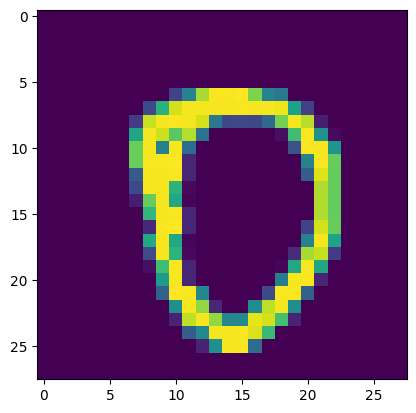

In [10]:
plt.imshow(df.iloc[37818,1:].values.reshape(28,28))

In [11]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [12]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
X_train.shape

(33600, 784)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
 knn=KNeighborsClassifier()

In [16]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [17]:
import time
start=time.time()
y_pred=knn.predict(X_test)
print(time.time()-start)

15.336458206176758


In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [19]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()

In [20]:
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.fit_transform(X_test)

In [21]:
#pca
from sklearn.decomposition import PCA
pca=PCA(n_components=100)

In [22]:
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [23]:
X_train_trf.shape

(33600, 100)

In [24]:
 knn=KNeighborsClassifier()

In [25]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [26]:
y_pred=knn.predict(X_test_trf) 

In [27]:
accuracy_score(y_test,y_pred)

0.9545238095238096

In [ ]:
for i in range (1,25):
    pca=PCA(n_components=i)
    X_train_trf=pca.fit_transform(X_train)
    X_test_trf=pca.transform(X_test)
    knn=KNeighborsClassifier()
    knn.fit(X_train_trf,y_train)
    y_pred=knn.predict(X_test_trf)
    print(accuracy_score(y_test,y_pred))

In [29]:
# transforming into 2d  coordinate system
pca=PCA(n_components=2)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [30]:
X_train_trf

array([[-2.71862388, -0.48946164],
       [-0.67701575, -6.75395   ],
       [-3.0332574 ,  6.50954737],
       ...,
       [ 2.14882666,  0.78131818],
       [ 1.05961429,  0.94837082],
       [17.70265711,  1.96247986]])

In [31]:
import plotly.express as px
y_train_trf=y_train.astype(str)
fig=px.scatter(x=X_train_trf[:,0],
               y=X_train_trf[:,1],
               color=y_train_trf,
               color_discrete_sequence=px.colors.qualitative.G10
              )
fig.show()


In [42]:
# transforming into 3d  coordinate system
pca=PCA(n_components=3)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [43]:
X_train_trf

array([[-2.71869519, -0.48928114,  1.13532071],
       [-0.6768815 , -6.75434993, -2.33599217],
       [-3.03332638,  6.51050547,  7.49213429],
       ...,
       [ 2.14892029,  0.78016208, -0.74738627],
       [ 1.05948552,  0.94837659,  3.94948306],
       [17.70267706,  1.96136575, -4.94384219]])

In [50]:
y_train_trf=y_train.astype(str)
fig=px.scatter_3d(df,x=X_train_trf[:,0],y=X_train_trf[:,1],z=X_train_trf[:,2],
            color=y_train_trf)
fig.update_layout(
    margin=dict(l=20,r=20,t=20,b=20)
)
fig.show()

In [51]:
pca.explained_variance_
# represent the eigen values..

array([40.67111197, 29.17023384, 26.74459616])

In [55]:
pca.components_
# represent eigen vectors 

array([[-1.67813447e-18,  2.71266191e-18,  2.27926975e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.08398085e-17,  4.03865681e-18,  1.48682703e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.93055500e-18, -4.73663488e-17, -4.31567898e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [54]:
pca.components_.shape

(3, 784)

In [58]:
pca.explained_variance_ratio_*100

array([5.78519225, 4.14926966, 3.804239  ])

In [59]:
pca=PCA(n_components=None)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [60]:
X_train_trf

array([[-2.71863253e+00, -4.89824095e-01,  1.13549660e+00, ...,
         0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-6.76980150e-01, -6.75362491e+00, -2.33590139e+00, ...,
        -5.10379073e-15,  7.79118999e-16, -1.17293683e-15],
       [-3.03323281e+00,  6.50981624e+00,  7.49182983e+00, ...,
        -1.61835946e-15,  1.39860508e-15,  1.88811181e-16],
       ...,
       [ 2.14883643e+00,  7.80794439e-01, -7.47387739e-01, ...,
        -2.95608201e-17, -1.34661705e-18,  1.18354137e-17],
       [ 1.05957006e+00,  9.47673116e-01,  3.94973114e+00, ...,
        -2.72376014e-17,  3.91847505e-17, -2.08729395e-17],
       [ 1.77025845e+01,  1.96188185e+00, -4.94352837e+00, ...,
         4.10256544e-17, -4.30837453e-18, -3.60381744e-18]])

In [67]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

In [64]:
pca.explained_variance_.shape

(784,)

In [65]:
pca.components_.shape

(784, 784)

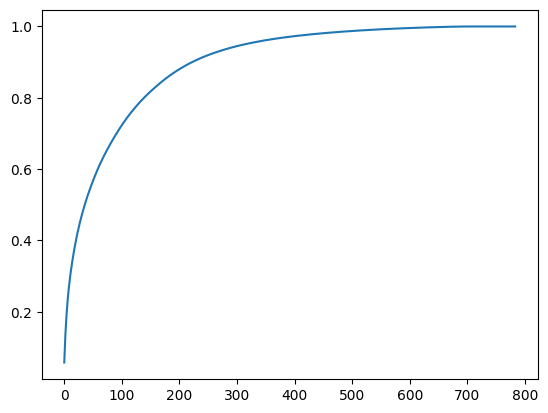

In [68]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))